In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score


In [ ]:
df=pd.read_csv('archive (1).zip')
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
df['MEDV']=df['MEDV'].div(100000)

In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564,4.543429
std,0.643650,7.081990,2.111268,1.653403
min,3.561000,1.980000,12.600000,1.050000
25%,5.880000,7.370000,17.400000,3.507000
50%,6.185000,11.690000,19.100000,4.389000
75%,6.575000,17.120000,20.200000,5.187000
max,8.398000,37.970000,22.000000,10.248000


'RM' is the average number of rooms among homes in the neighborhood.       
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).      
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

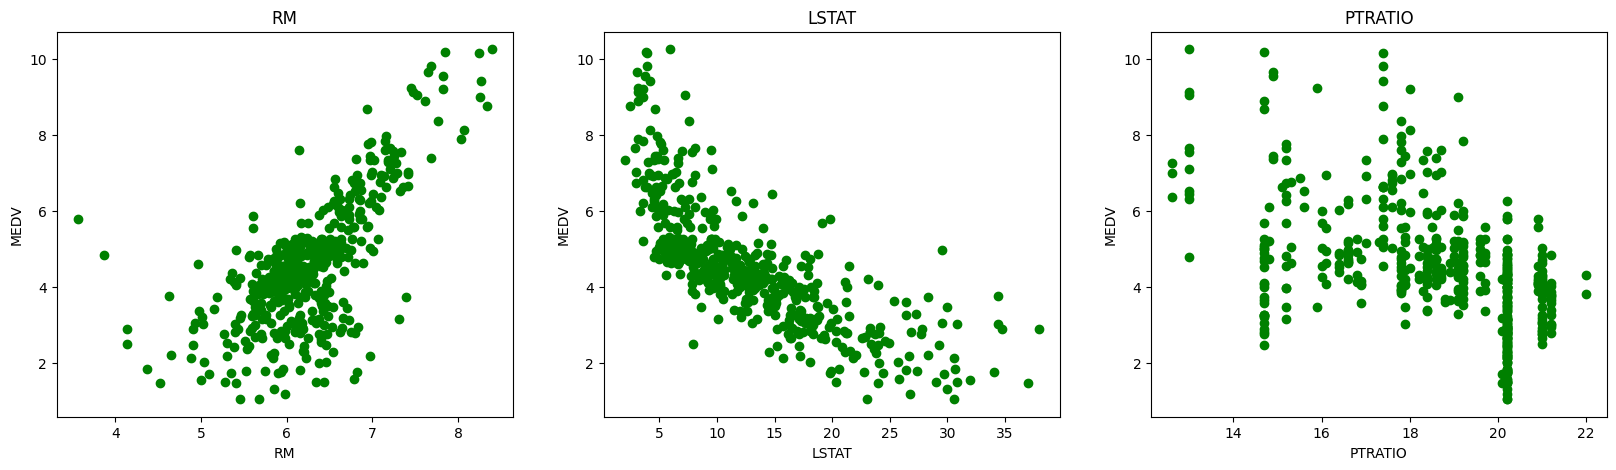

In [ ]:

plt.figure(figsize=(20, 5))
features = ['RM', 'LSTAT','PTRATIO']
target=df['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o',color='green')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

<Axes: >

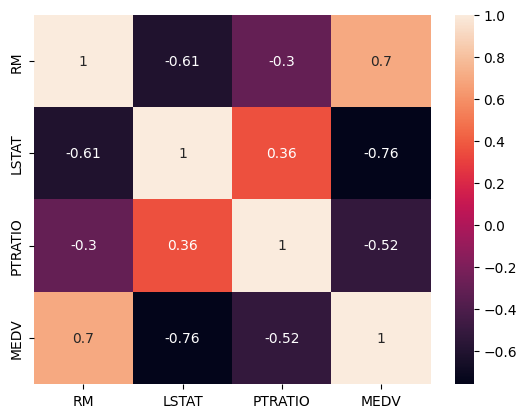

In [ ]:

correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
X = pd.DataFrame(np.c_[df['RM'],df['LSTAT'],df['PTRATIO']], columns = ['RM','LSTAT','PTRATIO'])
Y = df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(391, 3)
(98, 3)
(391,)
(98,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = lin_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(" MSE:", mse)
print("R2 : ",r2)

 MSE: 0.6789025559265864
R2 :  0.6910934003098523
